# Exploratory Data Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from wordcloud import WordCloud

In [3]:
data_folder = './data'

## IMDB Top 1000 movies

In [4]:
df = pd.read_csv(data_folder + '/imdb_top_1000.csv')

In [5]:
# Convert Gross column from str to int
df['Gross'] = df['Gross'].str.replace(',', '')
df['Gross'] = df['Gross'].astype('float64')
df['Gross'] = df['Gross'].replace(np.nan, 0)
df['Gross'] = df['Gross'].astype(int)

### Descriptive statistics

In [25]:
# General Overview
df.describe(include='all')

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,TopDirector
count,1000,1000,1000,899,1000,1000,1000.000000,1000,843.000000,1000,1000,1000,1000,1000,1.000000e+03,1.000000e+03,1000
unique,1000,999,100,16,140,202,NaN,1000,NaN,548,660,841,891,939,NaN,NaN,2
top,https://m.media-amazon.com/images/M/MV5BMDFkYT...,Drishyam,2014,U,100 min,Drama,NaN,Two imprisoned men bond over a number of years...,NaN,Alfred Hitchcock,Tom Hanks,Emma Watson,Rupert Grint,Michael Caine,NaN,NaN,False
freq,1,2,32,234,23,85,NaN,1,NaN,14,12,7,5,4,NaN,NaN,899
mean,NaN,NaN,NaN,NaN,NaN,NaN,7.949300,NaN,77.971530,NaN,NaN,NaN,NaN,NaN,2.736929e+05,5.653688e+07,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,0.275491,NaN,12.376099,NaN,NaN,NaN,NaN,NaN,3.273727e+05,1.032382e+08,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,7.600000,NaN,28.000000,NaN,NaN,NaN,NaN,NaN,2.508800e+04,0.000000e+00,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,7.700000,NaN,70.000000,NaN,NaN,NaN,NaN,NaN,5.552625e+04,4.457098e+05,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,7.900000,NaN,79.000000,NaN,NaN,NaN,NaN,NaN,1.385485e+05,1.070275e+07,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,8.100000,NaN,87.000000,NaN,NaN,NaN,NaN,NaN,3.741612e+05,6.153989e+07,NaN


In [26]:
# Distribution of Ratings and Scores
df[['IMDB_Rating', 'Meta_score']].describe()

,IMDB_Rating,Meta_score
count,1000.000000,843.000000
mean,7.949300,77.971530
std,0.275491,12.376099
min,7.600000,28.000000
25%,7.700000,70.000000
50%,7.900000,79.000000
75%,8.100000,87.000000
max,9.300000,100.000000


### Data Visualization

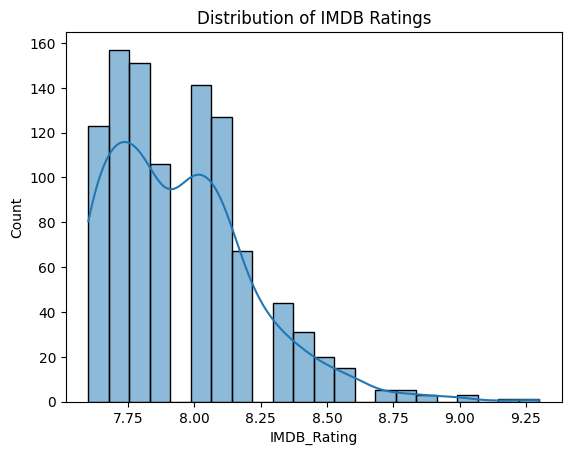

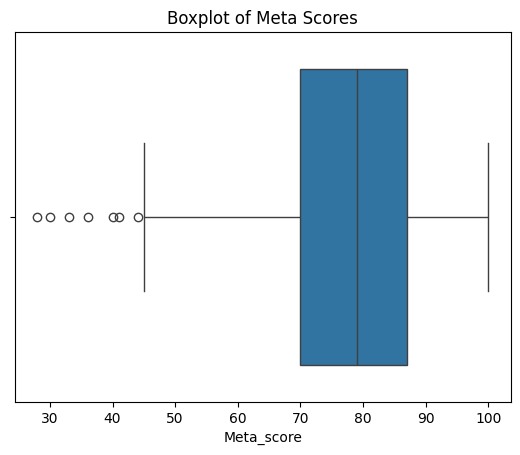

In [7]:
# Histogram for IMDB Rating
sns.histplot(df['IMDB_Rating'], kde=True)
plt.title('Distribution of IMDB Ratings')
plt.show()

# Boxplot for Meta_score
sns.boxplot(x=df['Meta_score'])
plt.title('Boxplot of Meta Scores')
plt.show()

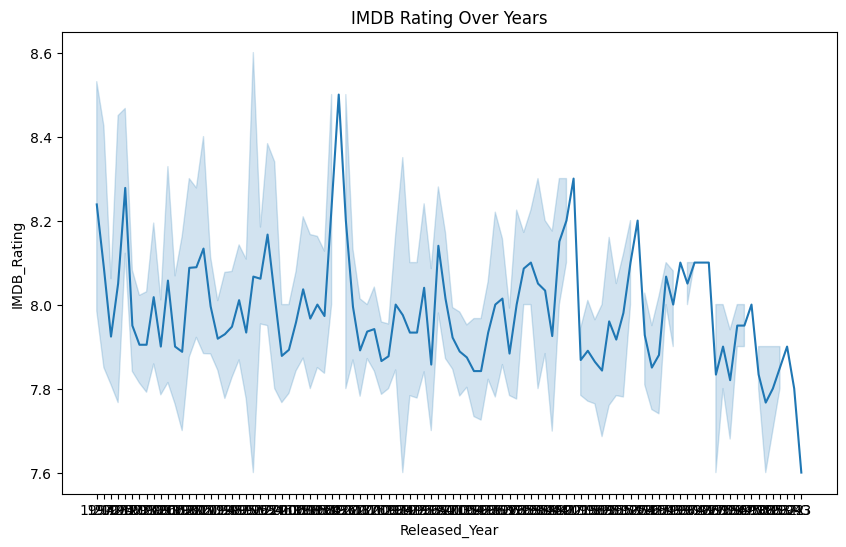

In [8]:
# ReleasedYear vs IMDB Rating
plt.figure(figsize=(10, 6))
sns.lineplot(x='Released_Year', y='IMDB_Rating', data=df)
plt.title('IMDB Rating Over Years')
plt.show()

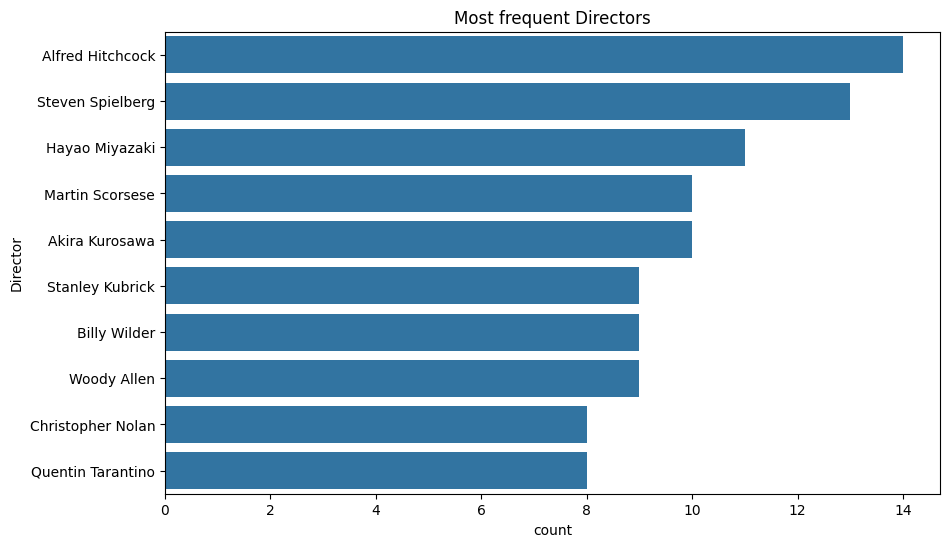

In [9]:
# Most frequent Directors
plt.figure(figsize=(10, 6))
sns.countplot(y='Director', data=df, order = df['Director'].value_counts().head(10).index)
plt.title('Most frequent Directors')
plt.show()

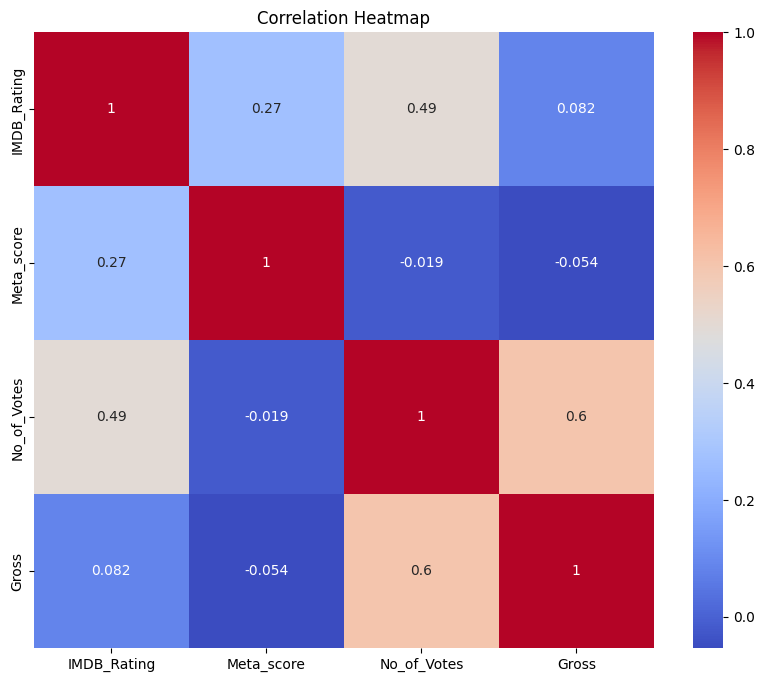

In [10]:
# Correlation heatmap
df_num = df[['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']]
plt.figure(figsize=(10, 8))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Categorical Data Analysis

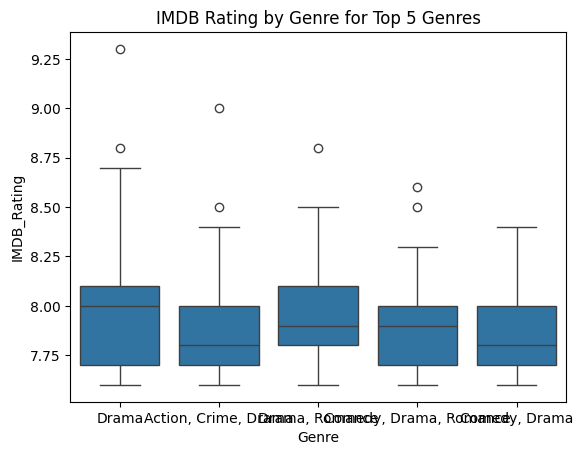

In [11]:
# Genre Analysis (Top 5 Genres)
top_genres = df['Genre'].value_counts().head(5).index
df_top_genres = df[df['Genre'].isin(top_genres)]
sns.boxplot(x='Genre', y='IMDB_Rating', data=df_top_genres)
plt.title('IMDB Rating by Genre for Top 5 Genres')
plt.show()

### Text Data Exploration

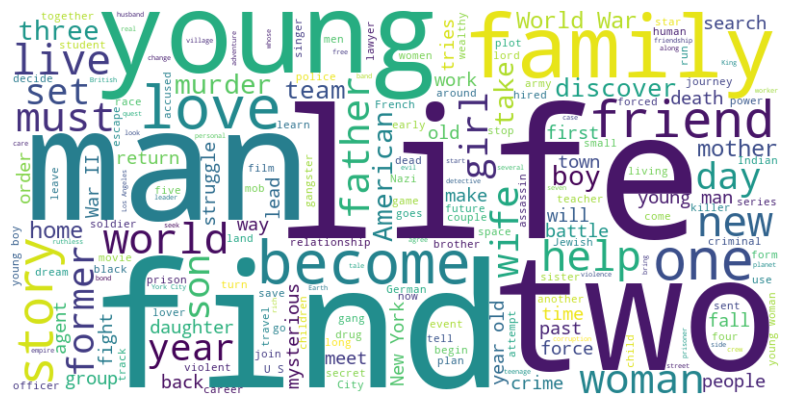

In [12]:
# Generating a word cloud for the 'Overview' column
text = ' '.join(df['Overview'].fillna(''))  # Join all overviews, fill NA values with an empty string
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Relationship Analysis

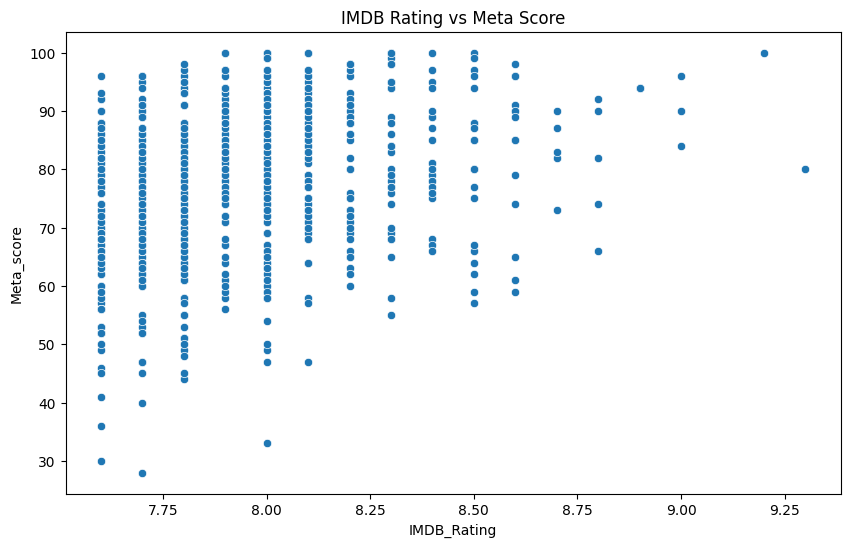

In [13]:
# Scatter plot for IMDB Rating vs Meta_score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='IMDB_Rating', y='Meta_score', data=df)
plt.title('IMDB Rating vs Meta Score')
plt.show()

### Anomaly Detection

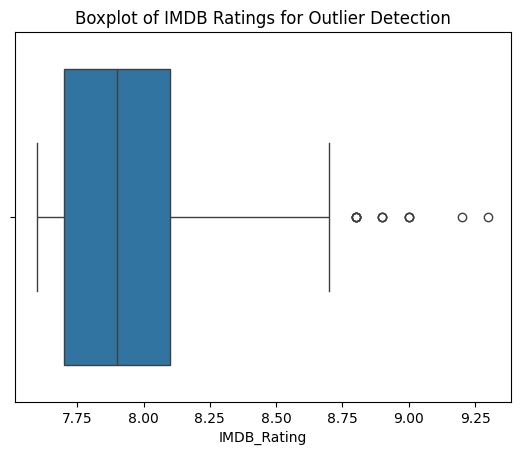

In [14]:
# Identifying outliers in IMDB Rating
sns.boxplot(x=df['IMDB_Rating'])
plt.title('Boxplot of IMDB Ratings for Outlier Detection')
plt.show()

### Trend Analysis

<Figure size 1200x600 with 0 Axes>

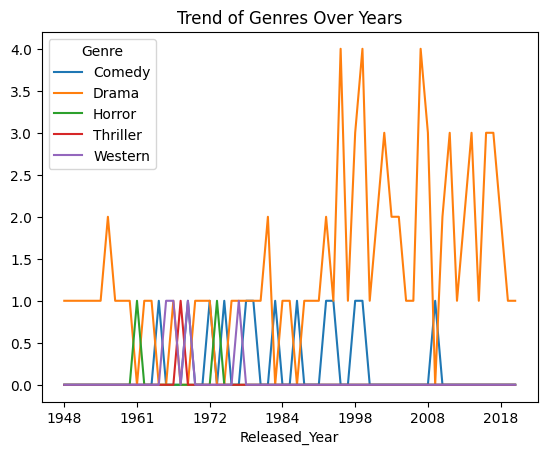

In [15]:
# Trend in movie genres' popularity
plt.figure(figsize=(12, 6))
genres_without_comma = df[~df['Genre'].str.contains(',')] # exclude genres with comma for visibility
genres_over_time = df.groupby(['Released_Year', genres_without_comma['Genre']]).size().unstack().fillna(0)
genres_over_time.plot(kind='line')
plt.title('Trend of Genres Over Years')
plt.show()

### Comparative Analysis

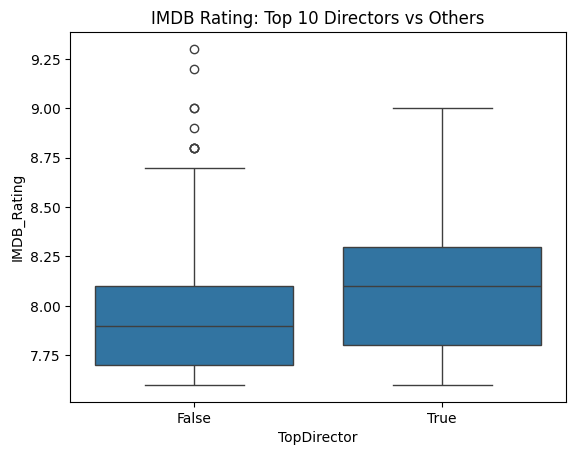

In [16]:
# Compare movies by top 10 directors vs others
top_directors = df['Director'].value_counts().head(10).index
df['TopDirector'] = df['Director'].isin(top_directors)
sns.boxplot(x='TopDirector', y='IMDB_Rating', data=df)
plt.title('IMDB Rating: Top 10 Directors vs Others')
plt.show()

## IMDB Reviews

In [17]:
df_reviews = pd.read_csv(data_folder + '/imdb_reviews.csv')

### Basic overview

In [18]:
# Display the first few rows
df_reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [19]:
# Check for missing values
df_reviews.isnull().sum()

review       0
sentiment    0
dtype: int64

In [20]:
# Distribution of sentiments
df_reviews['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

### Text Length Analysis

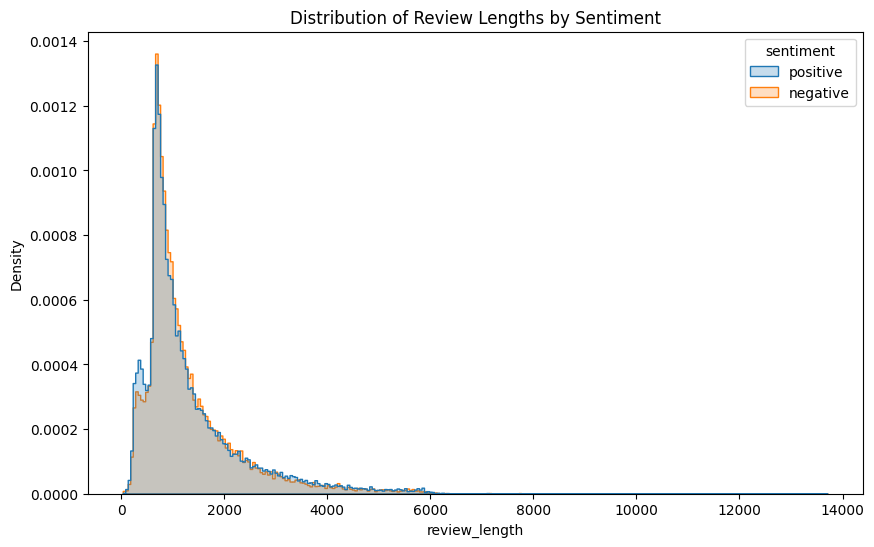

In [21]:
# Calculate the length of each review
df_reviews['review_length'] = df_reviews['review'].apply(len)

# Plot the distribution of review lengths
plt.figure(figsize=(10, 6))
sns.histplot(data=df_reviews, x='review_length', hue='sentiment', element="step", stat="density", common_norm=False)
plt.title('Distribution of Review Lengths by Sentiment')
plt.show()

### Word Frequency Analysis

In [22]:
def plot_word_cloud(text, title="Word Cloud"):
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(" ".join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

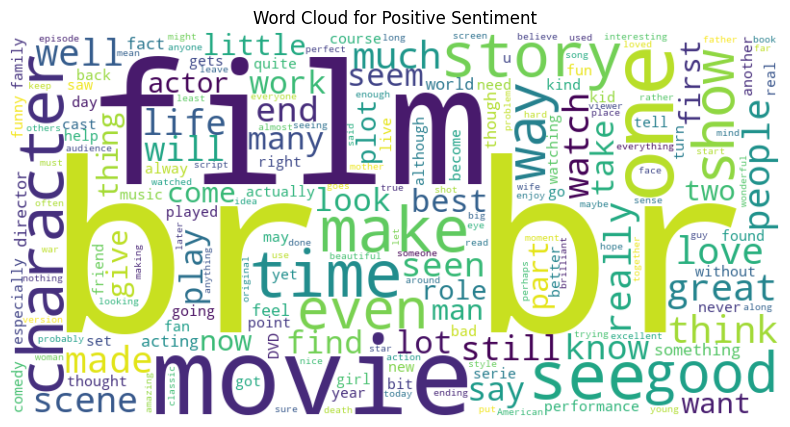

In [23]:
# Word cloud for positive sentiment
positive_reviews = df_reviews[df_reviews['sentiment'] == 'positive']['review']
plot_word_cloud(positive_reviews, title="Word Cloud for Positive Sentiment")

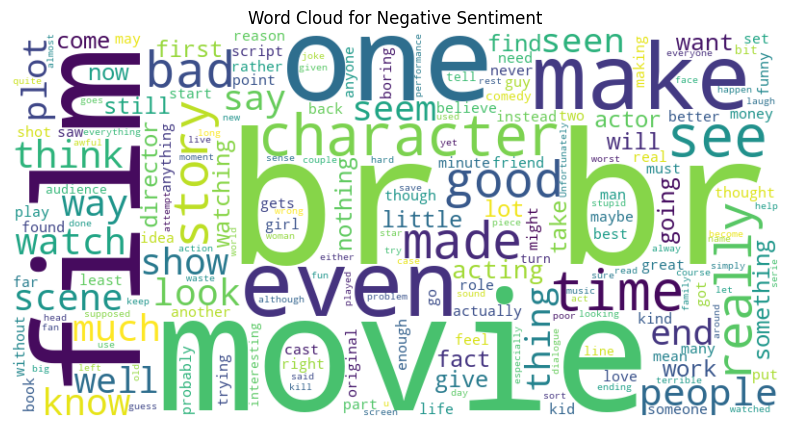

In [24]:
# Word cloud for negative sentiment
negative_reviews = df_reviews[df_reviews['sentiment'] == 'negative']['review']
plot_word_cloud(negative_reviews, title="Word Cloud for Negative Sentiment")